<a href="https://colab.research.google.com/github/ambitama-poddar/Machine-Learning-Practicals/blob/main/DA_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ITA6016 Machine Learning**

**Lab Assessment Task - 3**

**Submitted by Ambitama Poddar(22MCA0106)**

# 1. Custom CNN model for predicting brain tumor from scanned image

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip drive/My\ Drive/Colab\ Notebooks/archive.zip

Archive:  drive/My Drive/Colab Notebooks/archive.zip
  inflating: Testing/glioma_tumor/image(1).jpg  
  inflating: Testing/glioma_tumor/image(10).jpg  
  inflating: Testing/glioma_tumor/image(100).jpg  
  inflating: Testing/glioma_tumor/image(11).jpg  
  inflating: Testing/glioma_tumor/image(12).jpg  
  inflating: Testing/glioma_tumor/image(13).jpg  
  inflating: Testing/glioma_tumor/image(14).jpg  
  inflating: Testing/glioma_tumor/image(15).jpg  
  inflating: Testing/glioma_tumor/image(16).jpg  
  inflating: Testing/glioma_tumor/image(17).jpg  
  inflating: Testing/glioma_tumor/image(18).jpg  
  inflating: Testing/glioma_tumor/image(19).jpg  
  inflating: Testing/glioma_tumor/image(2).jpg  
  inflating: Testing/glioma_tumor/image(20).jpg  
  inflating: Testing/glioma_tumor/image(21).jpg  
  inflating: Testing/glioma_tumor/image(22).jpg  
  inflating: Testing/glioma_tumor/image(23).jpg  
  inflating: Testing/glioma_tumor/image(24).jpg  
  inflating: Testing/glioma_tumor/image(25).jpg 

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
        rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/Training',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        class_mode='categorical')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/Testing',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        class_mode='categorical')

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(4, activation='softmax'))
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 128)               2

In [6]:
model_history = model.fit(
train_generator,
epochs = 10,
validation_data = validation_generator)

Epoch 1/10
90/90 [==============================] - 21s 101ms/step - loss: 0.9932 - accuracy: 0.6213 - val_loss: 1.7315 - val_accuracy: 0.4721
Epoch 2/10
90/90 [==============================] - 9s 99ms/step - loss: 0.3417 - accuracy: 0.8707 - val_loss: 1.8068 - val_accuracy: 0.6878
Epoch 3/10
90/90 [==============================] - 9s 103ms/step - loss: 0.1357 - accuracy: 0.9530 - val_loss: 2.7088 - val_accuracy: 0.7614
Epoch 4/10
90/90 [==============================] - 8s 92ms/step - loss: 0.0675 - accuracy: 0.9784 - val_loss: 2.9748 - val_accuracy: 0.7716
Epoch 5/10
90/90 [==============================] - 9s 104ms/step - loss: 0.0486 - accuracy: 0.9857 - val_loss: 3.3358 - val_accuracy: 0.7563
Epoch 6/10
90/90 [==============================] - 11s 120ms/step - loss: 0.0340 - accuracy: 0.9906 - val_loss: 4.2009 - val_accuracy: 0.7437
Epoch 7/10
90/90 [==============================] - 8s 87ms/step - loss: 0.0157 - accuracy: 0.9955 - val_loss: 4.0540 - val_accuracy: 0.7538
Epoch 8

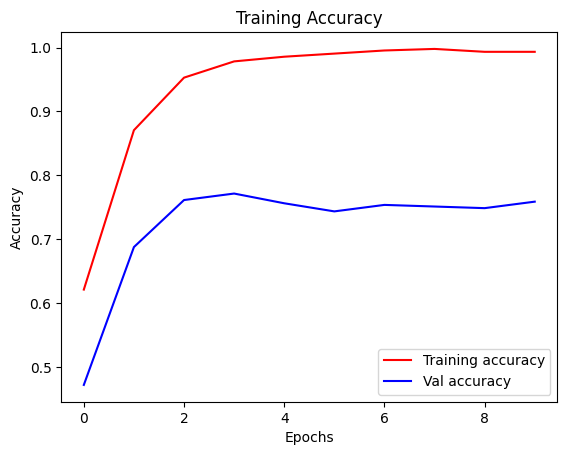

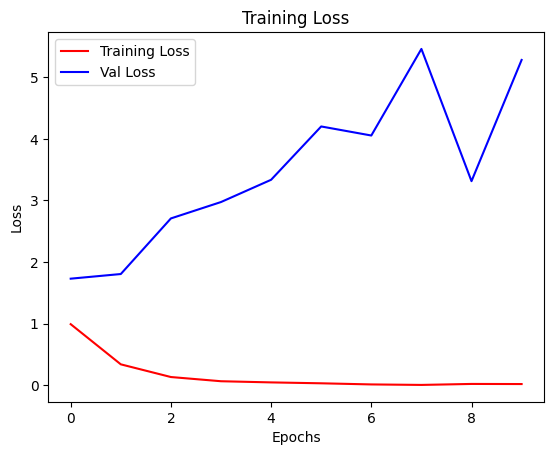

In [7]:
import matplotlib.pyplot as plt
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Val accuracy')
plt.title('Training Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Val Loss')
plt.title('Training Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

# 2. Using VGGNet model for predicting brain tumor from scanned image

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
        rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/Training',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        class_mode='categorical')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/Testing',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        class_mode='categorical')

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [9]:
model = tf.keras.applications.VGG19(weights = "imagenet", include_top=False, input_shape = (224, 224, 3))
#Adding custom Layers
x = model.output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024, activation="relu")(x)
predictions = tf.keras.layers.Dense(4, activation="softmax")(x)
model = tf.keras.Model(inputs = model.input, outputs = predictions)
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

80134624/80134624 [==============================] - 3s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [10]:
model_history = model.fit(
train_generator,
epochs = 30,
validation_data = validation_generator)

Epoch 1/30
90/90 [==============================] - 72s 599ms/step - loss: 1.8050 - accuracy: 0.2902 - val_loss: 1.4456 - val_accuracy: 0.1878
Epoch 2/30
90/90 [==============================] - 44s 488ms/step - loss: 1.3500 - accuracy: 0.2822 - val_loss: 1.4893 - val_accuracy: 0.2843
Epoch 3/30
90/90 [==============================] - 44s 487ms/step - loss: 1.1788 - accuracy: 0.4502 - val_loss: 1.7890 - val_accuracy: 0.2690
Epoch 4/30
90/90 [==============================] - 44s 490ms/step - loss: 1.0267 - accuracy: 0.5324 - val_loss: 1.8825 - val_accuracy: 0.2310
Epoch 5/30
90/90 [==============================] - 45s 498ms/step - loss: 1.0083 - accuracy: 0.5439 - val_loss: 2.0580 - val_accuracy: 0.3096
Epoch 6/30
90/90 [==============================] - 44s 483ms/step - loss: 0.8341 - accuracy: 0.6300 - val_loss: 2.2194 - val_accuracy: 0.3731
Epoch 7/30
90/90 [==============================] - 44s 491ms/step - loss: 0.7952 - accuracy: 0.6516 - val_loss: 2.1717 - val_accuracy: 0.3680

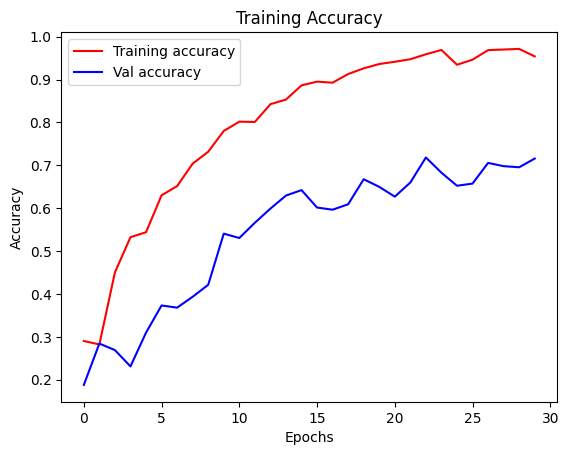

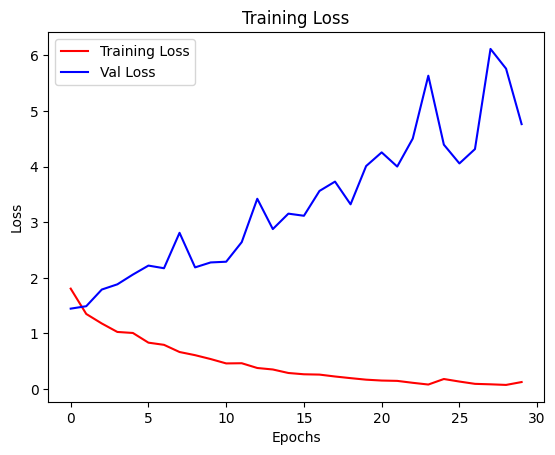

In [11]:
import matplotlib.pyplot as plt
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Val accuracy')
plt.title('Training Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Val Loss')
plt.title('Training Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

# Conclusion:

Based on the comparison, the custom CNN model outperforms the VGGNet model in terms of both loss and accuracy. The custom CNN achieved a significantly lower loss of 0.0219 and a higher accuracy of 0.9934 compared to VGGNet's loss of 0.1262 and accuracy of 0.9540. This indicates that the custom CNN model is better suited for the specific task or dataset, as it demonstrates superior performance in accurately predicting the target classes with minimal error. The custom CNN's higher accuracy makes it a more reliable choice for practical applications where precision and performance are critical.